In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import time
from scipy import signal
from scipy.io import wavfile

### Task 1

In [3]:
def dft(xt):
    # extract data length, N
    N = xt.size
    # build a fourier matrix by multiplying appropriate matricies
    k,l = np.meshgrid(np.arange(N), np.arange(N))
    F = np.matmul(l, k) / N
    # raise complex exponential to powers in F
    w = np.exp(-2*np.pi*1j/N)
    W = np.power(w, F)
    # simple matrix multiplication to extract dft
    Xw = np.matmul(W, xt)
    
    return Xw

In [4]:
x = np.random.normal(scale=1, size=100)+1j*np.random.normal(scale=1,size=100)

In [5]:
assert(dft(x).all() == np.fft.fft(x).all())

### Task 2

In [6]:
t0 = time.time()
dft(x);
t1 = time.time()
t1-t0

0.003735065460205078

In [7]:
t0 = time.time()
np.fft.fft(x);
t1 = time.time()
t1-t0

0.00020575523376464844

<IPython.core.display.Javascript object>


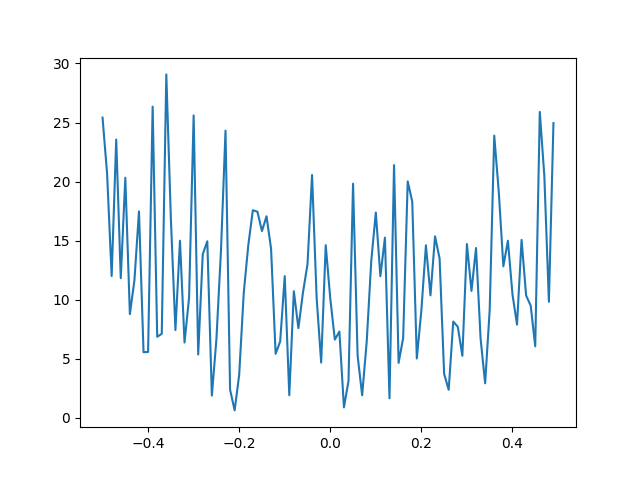

In [497]:
plt.figure()
plt.plot(np.fft.fftshift(np.fft.fftfreq(100)), np.fft.fftshift(np.abs(np.fft.fft(x))))

In [15]:
Ns = np.array([i**2 for i in range(5, 45)])

In [358]:
dft_times = np.zeros(Ns.size)
for i in range(Ns.size):
    n = Ns[i]
    xl = np.random.normal(size=n)+1j*np.random.normal(size=n)
    t0 = time.time()
    dft(xl)
    t1 = time.time()
    dft_times[i] = t1-t0

In [340]:
Nsf = np.array([i**2 for i in range(5, 500)])
fft_times = np.zeros(Nsf.size)
for i in range(Nsf.size):
    n = Nsf[i]
    xl = np.random.normal(size=n)+1j*np.random.normal(size=n)
    t0 = time.time()
    np.fft.fft(xl)
    t1 = time.time()
    fft_times[i] = t1-t0

<IPython.core.display.Javascript object>


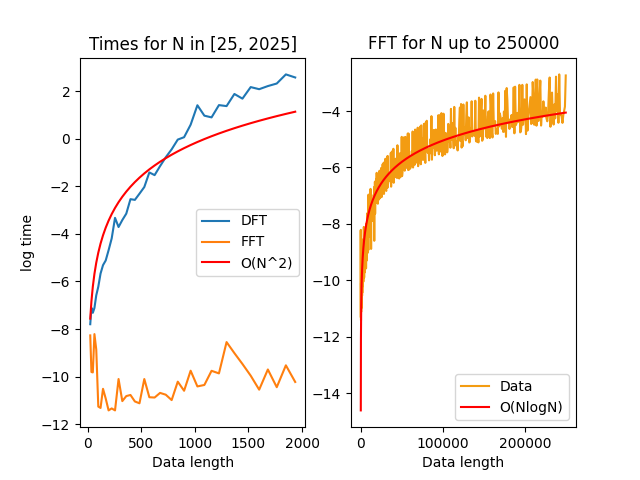

Text(0.5, 0, 'Data length')

In [359]:
plt.figure()
plt.subplot(121)
plt.plot(Ns, np.log(dft_times), label='DFT')
plt.plot(Ns, np.log(fft_times[:dft_times.shape[0]]), label='FFT')
plt.plot(Ns, np.log(Ns*Ns)-14, color='red', label='O(N^2)')
plt.title('Times for N in [25, 2025]')
plt.xlabel('Data length')
plt.ylabel('log time')
plt.legend()
plt.subplot(122)
plt.plot(Nsf, np.log(fft_times), color='#F39C12', label='Data')
plt.plot(Nsf, np.log(Nsf*np.log(Nsf))-19, color='red', label='O(NlogN)')
plt.legend()
plt.title('FFT for N up to 250000')
plt.xlabel('Data length')


### Task 3

In [8]:
theta = 0.3*2*np.pi
T = 1
# window length
M = 64
# no of samples
N = 1024
t = np.arange(N)
y = np.sin(t*theta/T)
y2 = np.cos(t*theta/T)
y3 = np.exp(1j*t*theta/T)
wind = signal.windows.hamming(M)
window_padded = np.pad(wind, (0, N-M))

<IPython.core.display.Javascript object>


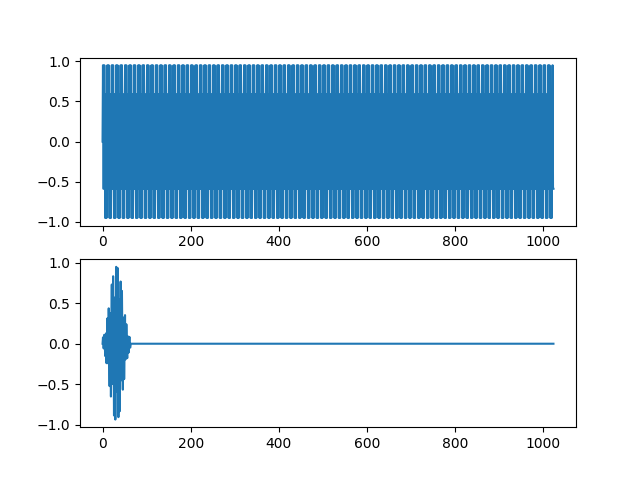

In [9]:
plt.figure()
plt.subplot(212)
plt.plot(t, y*window_padded)
plt.subplot(211)
plt.plot(t, y)

<IPython.core.display.Javascript object>


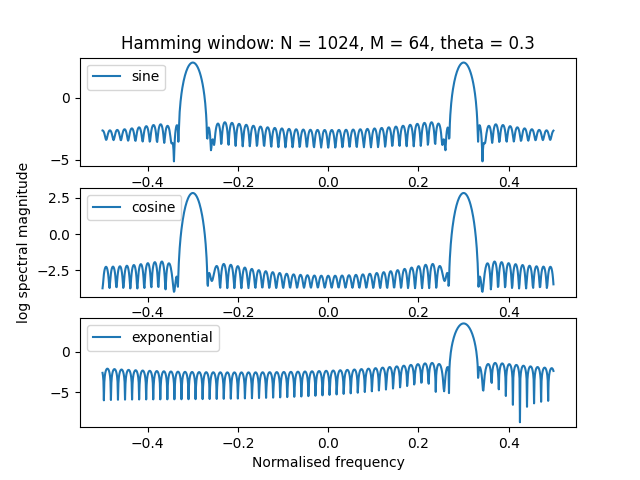

In [10]:
plt.figure()
plt.subplot(311)
plt.title('Hamming window: N = 1024, M = 64, theta = 0.3')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y*window_padded)))), label='sine')
plt.legend(loc='upper left')
plt.subplot(312)
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y2*window_padded)))), label='cosine')
plt.legend(loc='upper left')
plt.subplot(313)
plt.xlabel('Normalised frequency')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y3*window_padded)))), label='exponential')
plt.legend(loc='upper left')

In [11]:
theta1 = 0.15*2*np.pi
theta2 = 0.3*2*np.pi
theta3 = 0.45*2*np.pi
y4 = np.sin(t*theta1/T)
y5 = np.sin(t*theta2/T)
y6 = np.sin(t*theta3/T)
wind = signal.windows.hamming(M)
window_padded = np.pad(wind, (0, N-M))

<IPython.core.display.Javascript object>


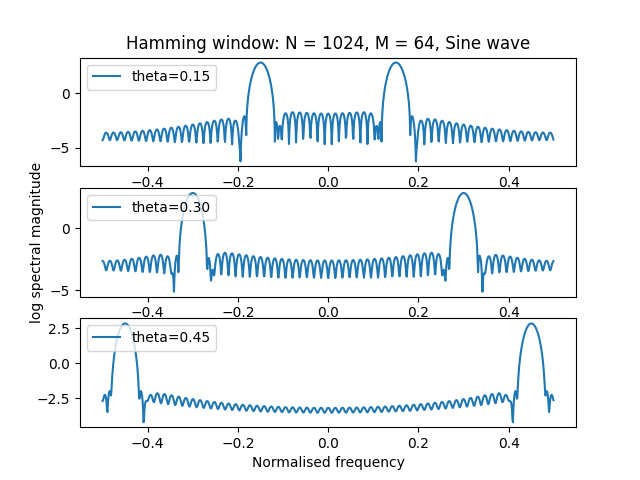

In [12]:
plt.figure()
plt.subplot(311)
plt.title('Hamming window: N = 1024, M = 64, Sine wave')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y4*window_padded)))), label='theta=0.15')
plt.legend(loc='upper left')
plt.subplot(312)
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y5*window_padded)))), label='theta=0.30')
plt.legend(loc='upper left')
plt.subplot(313)
plt.xlabel('Normalised frequency')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y6*window_padded)))), label='theta=0.45')
plt.legend(loc='upper left')

In [13]:
M1 = 32
M2 = 64
M3 = 128
M4 = 512
y7 = np.sin(t*theta/T)
y8 = np.sin(t*theta/T)
y9 = np.sin(t*theta/T)
y10 = np.sin(t*theta/T)
wind1 = signal.windows.hamming(M1)
window_padded1 = np.pad(wind1, (0, N-M1))
wind2 = signal.windows.hamming(M2)
window_padded2 = np.pad(wind2, (0, N-M2))
wind3 = signal.windows.hamming(M3)
window_padded3= np.pad(wind3, (0, N-M3))
wind4 = signal.windows.hamming(M4)
window_padded4 = np.pad(wind4, (0, N-M4))

<IPython.core.display.Javascript object>


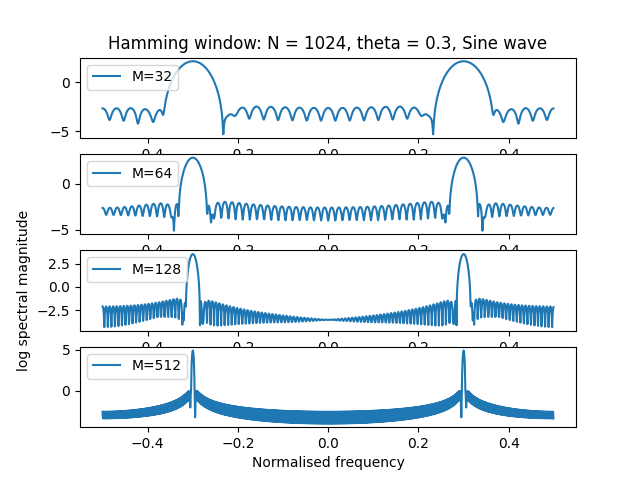

In [14]:
plt.figure()
plt.subplot(411)
plt.title('Hamming window: N = 1024, theta = 0.3, Sine wave')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y7*window_padded1)))), label='M=32')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y8*window_padded2)))), label='M=64')
plt.legend(loc='upper left')
plt.subplot(413)
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y9*window_padded3)))), label='M=128')
plt.legend(loc='upper left')
plt.subplot(414)
plt.xlabel('Normalised frequency')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y10*window_padded4)))), label='M=512')
plt.legend(loc='upper left')

In [194]:
y11 = np.sin(t*theta/T)
window_padded11 = np.pad(signal.windows.boxcar(M), (0, N-M))
window_padded12 = np.pad(signal.windows.hamming(M), (0, N-M))
window_padded13 = np.pad(signal.windows.bartlett(M), (0, N-M))
window_padded14 = np.pad(signal.windows.chebwin(M, at=60), (0, N-M))

<IPython.core.display.Javascript object>


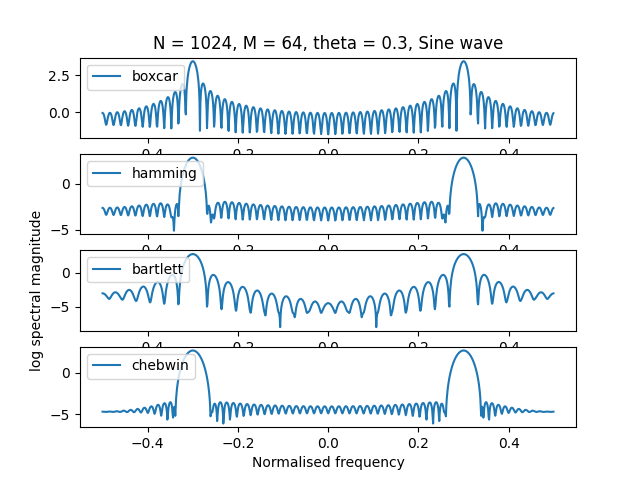

In [195]:
plt.figure()
plt.subplot(411)
plt.title('N = 1024, M = 64, theta = 0.3, Sine wave')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y11*window_padded11)))), label='boxcar')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y11*window_padded12)))), label='hamming')
plt.legend(loc='upper left')
plt.subplot(413)
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y11*window_padded13)))), label='bartlett')
plt.legend(loc='upper left')
plt.subplot(414)
plt.xlabel('Normalised frequency')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y11*window_padded14)))), label='chebwin')
plt.legend(loc='upper left')

### Task 4

In [17]:
y_c = y + np.sqrt(0.00001)*np.random.normal(size=N)+1
y_c2 = y + np.sqrt(0.001)*np.random.normal(size=N)+1
y_c3 = y + np.sqrt(0.1)*np.random.normal(size=N)
y_c4 = y + np.sqrt(1.)*np.random.normal(size=N)

<IPython.core.display.Javascript object>


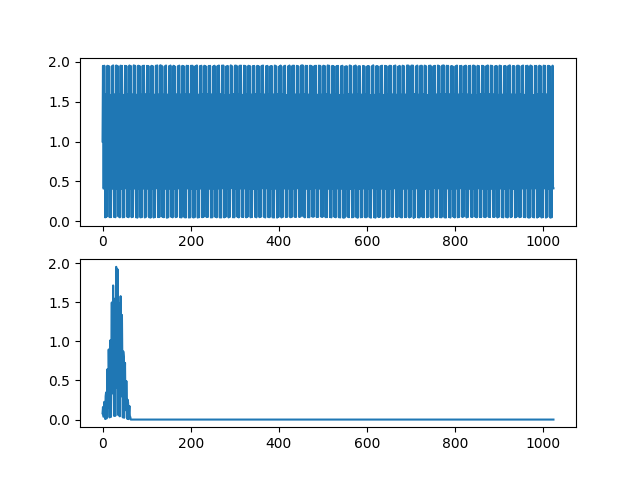

In [18]:
plt.figure()
plt.subplot(211)
plt.plot(t, y_c)
plt.subplot(212)
plt.plot(t, y_c*window_padded)

<IPython.core.display.Javascript object>


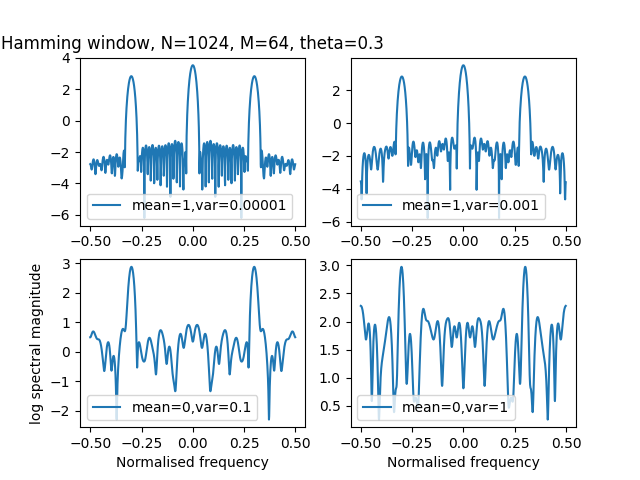

Text(0.5, 0, 'Normalised frequency')

In [19]:
plt.figure()
plt.subplot(221)
plt.title('Hamming window, N=1024, M=64, theta=0.3')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y_c*window_padded)))), label='mean=1,var=0.00001')
plt.legend(loc='lower left')
plt.subplot(222)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y_c2*window_padded)))), label='mean=1,var=0.001')
plt.legend(loc='lower left')
plt.subplot(223)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y_c3*window_padded)))), label='mean=0,var=0.1')
plt.legend(loc='lower left')
plt.ylabel('log spectral magnitude')
plt.xlabel('Normalised frequency')
plt.subplot(224)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(y_c4*window_padded)))), label='mean=0,var=1')
plt.legend(loc='lower left')
plt.xlabel('Normalised frequency')

### Task 5

In [187]:
A = 0.01
B = 0.01
an = A*t + B
an2 = t+100
yn = an * np.exp(1j * theta * t)
yn2 = an2 * np.exp(1j * theta * t)

<IPython.core.display.Javascript object>


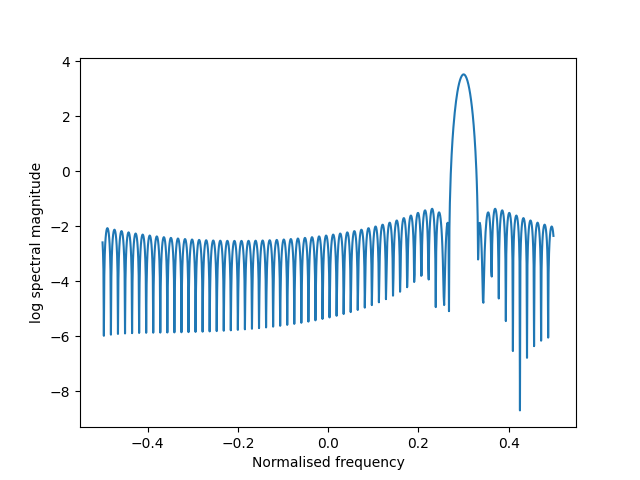

In [188]:
plt.figure()
plt.xlabel('Normalised frequency')
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(np.exp(1j * theta * t)*window_padded)))))

<IPython.core.display.Javascript object>


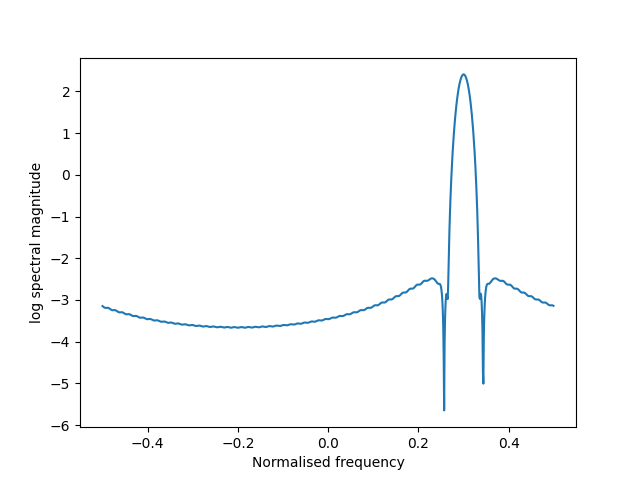

In [189]:
plt.figure()
plt.xlabel('Normalised frequency')
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(yn*window_padded)))))

<IPython.core.display.Javascript object>


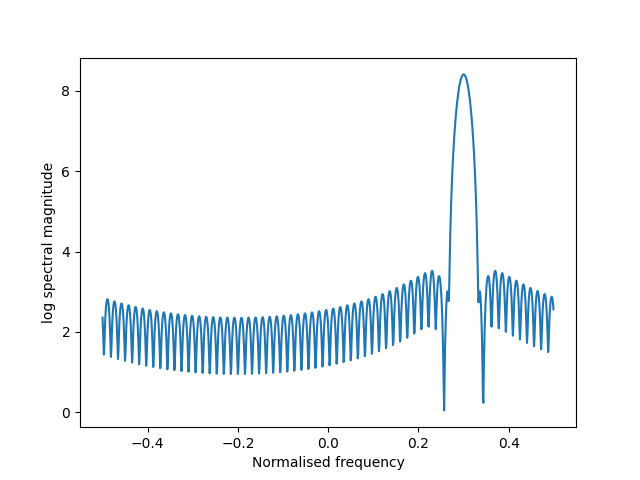

In [86]:
plt.figure()
plt.xlabel('Normalised frequency')
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(yn2*window_padded)))))

In [147]:
beta = 0.05
phi = 0.2
bn = 1 + beta * np.sin(phi*t)
zn = bn * np.exp(1j * theta * t)
zn2 = (1 + 0.05*np.sin(0.5*t))*np.exp(1j * theta * t)

<IPython.core.display.Javascript object>


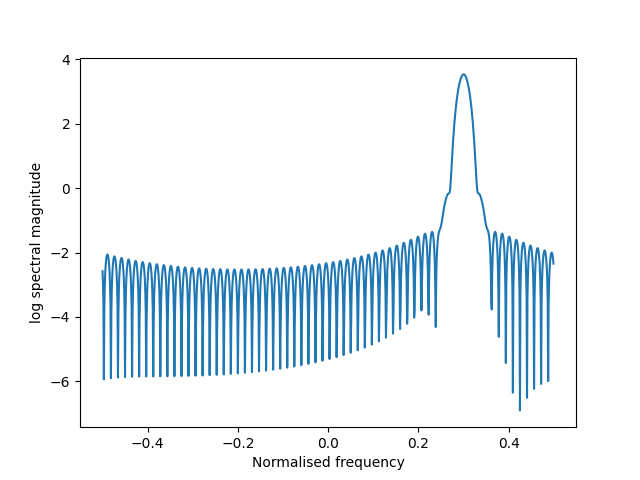

In [148]:
plt.figure()
plt.xlabel('Normalised frequency')
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(zn*window_padded)))))

<IPython.core.display.Javascript object>


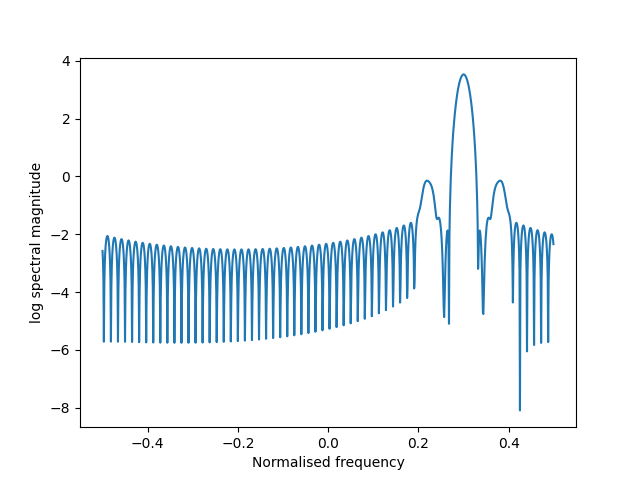

In [149]:
plt.figure()
plt.xlabel('Normalised frequency')
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(zn2*window_padded)))))

In [177]:
cn = np.zeros(N)
cn[0] = 0
for i in range(1, N):
    cn[i] = cn[i-1] + np.sqrt(0.1)*np.random.normal()

<IPython.core.display.Javascript object>


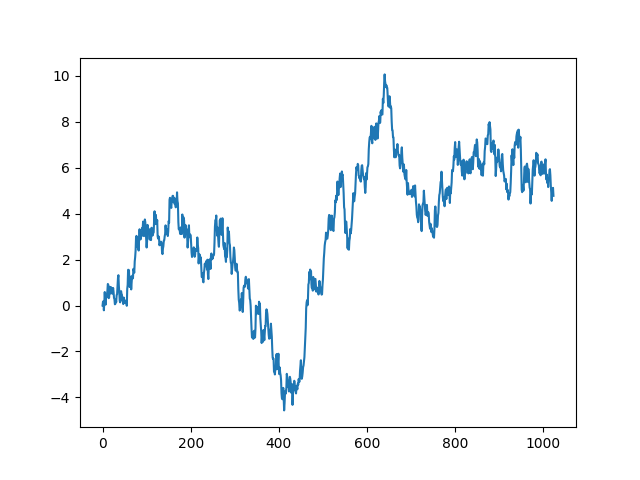

In [178]:
plt.figure()
plt.plot(t, cn)

<IPython.core.display.Javascript object>


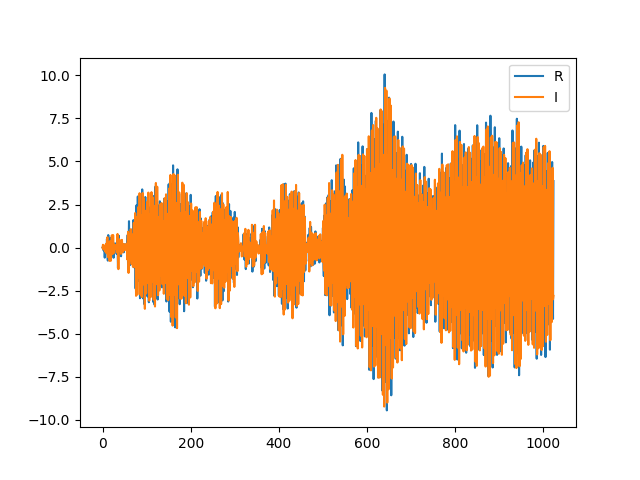

In [179]:
xn = cn * np.exp(1j * theta * t)
plt.figure()
plt.plot(t, xn.real, label='R')
plt.plot(t, xn.imag, label='I')
plt.legend()

<IPython.core.display.Javascript object>


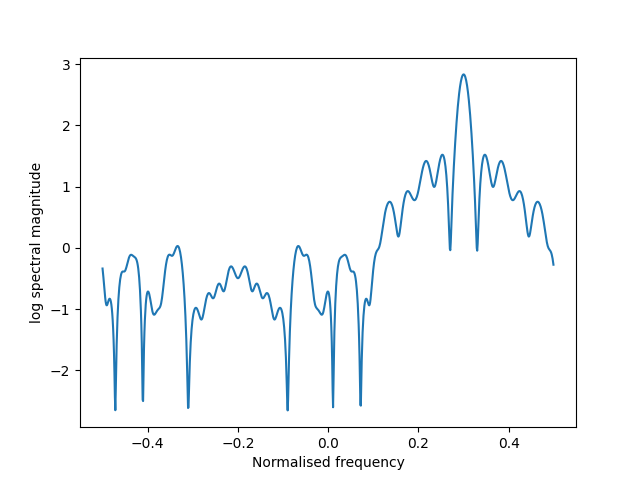

In [180]:
plt.figure()
plt.xlabel('Normalised frequency')
plt.ylabel('log spectral magnitude')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N)), np.fft.fftshift(np.log(np.abs(np.fft.fft(xn*window_padded)))))

### Task 6

In [196]:
samplerate, data = wavfile.read('./resources/network.wav')
data_trunc = data[:1323000]
length = data_trunc.shape[0] / samplerate

In [197]:
length

30.0

In [198]:
wavfile.write('./resources/network_30s.wav', samplerate, data_trunc)

<IPython.core.display.Javascript object>


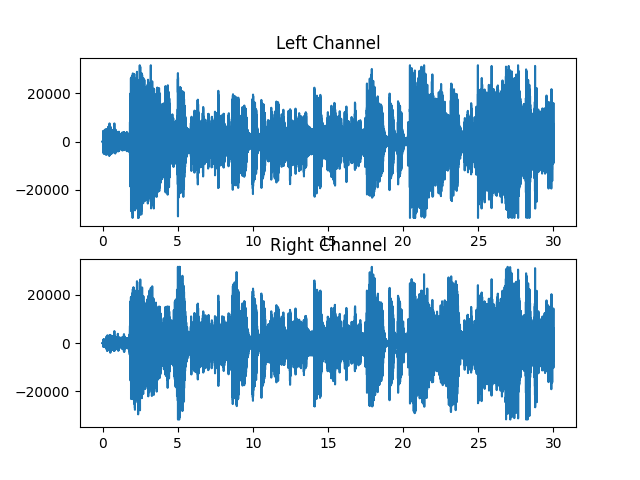

Text(0.5, 1.0, 'Right Channel')

In [199]:
axis = np.linspace(0., length, data_trunc.shape[0])
plt.figure()
plt.subplot(211)
plt.plot(axis, data_trunc[:,0], label='Left')
plt.title('Left Channel')
plt.subplot(212)
plt.plot(axis, data_trunc[:,1], label='Right')
plt.title('Right Channel')

In [260]:
bass_transient = data[15418980:15423975]
wavfile.write('./resources/bass_transient.wav', samplerate, bass_transient)
bass_minus_mean = bass_transient - np.mean(bass_transient)

<IPython.core.display.Javascript object>


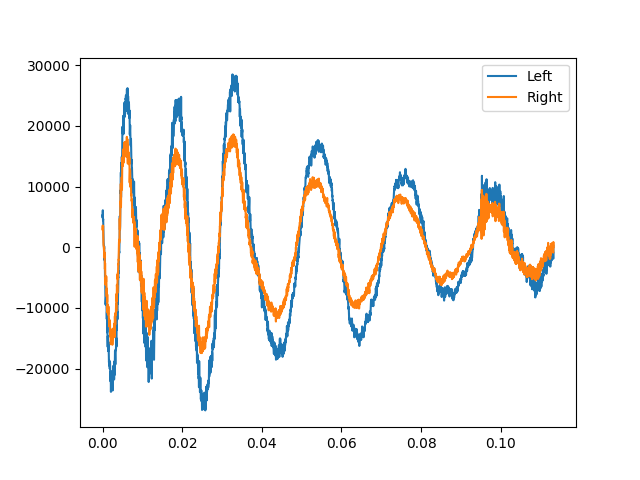

In [261]:
axis = np.linspace(0., bass_transient.shape[0]/samplerate, bass_transient.shape[0])
plt.figure()
plt.plot(axis, bass_minus_mean[:,0], label='Left')
plt.plot(axis, bass_minus_mean[:,1], label='Right')
plt.legend()

In [262]:
snare_transient = data[8859690:8883945]
wavfile.write('./resources/snare_transient.wav', samplerate, snare_transient)
snare_minus_mean = snare_transient - np.mean(snare_transient)

<IPython.core.display.Javascript object>


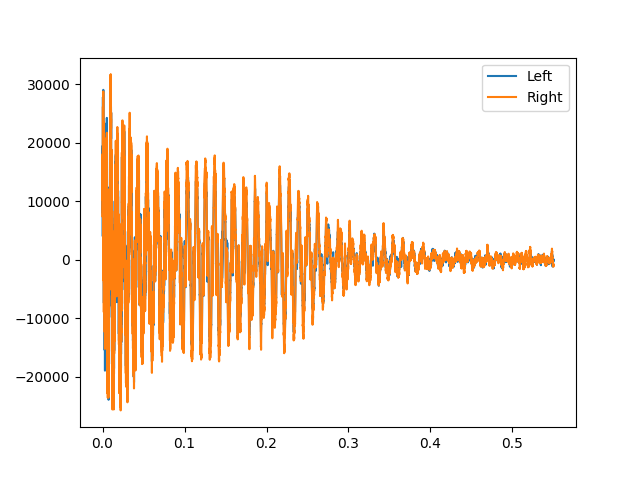

In [263]:
axis = np.linspace(0., snare_transient.shape[0]/samplerate, snare_transient.shape[0])
plt.figure()
plt.plot(axis, snare_transient[:,0], label='Left')
plt.plot(axis, snare_transient[:,1], label='Right')
plt.legend()

In [267]:
steady_note = data[9225279:9234540]
wavfile.write('./resources/steady_note.wav', samplerate, steady_note)
note_minus_mean0 = steady_note[:,0] - np.mean(steady_note[:,0])
note_minus_mean1 = steady_note[:,1] - np.mean(steady_note[:,1])

<IPython.core.display.Javascript object>


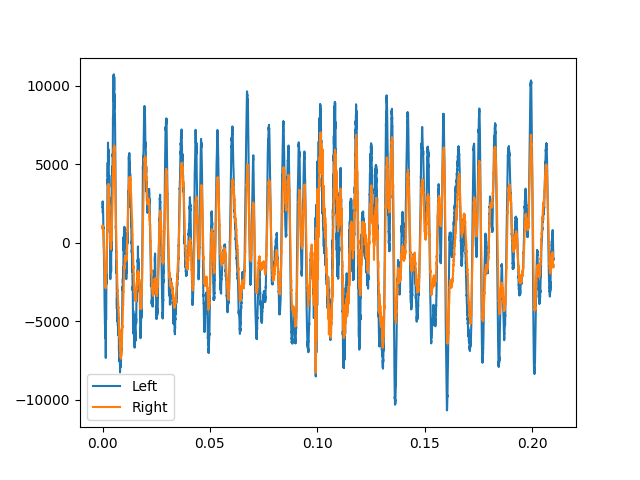

In [206]:
axis = np.linspace(0., steady_note.shape[0]/samplerate, steady_note.shape[0])
plt.figure()
plt.plot(axis, steady_note[:,0], label='Left')
plt.plot(axis, steady_note[:,1], label='Right')
plt.legend()

In [207]:
ma_sound = data[15841161:15848658]
wavfile.write('./resources/ma_sound.wav', samplerate, ma_sound)

<IPython.core.display.Javascript object>


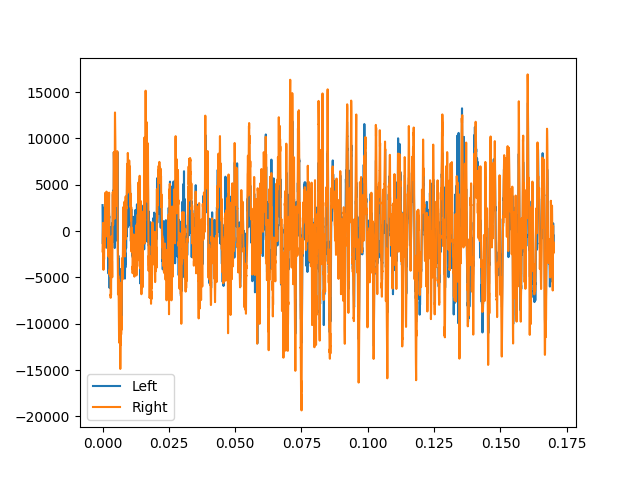

In [208]:
axis = np.linspace(0., ma_sound.shape[0]/samplerate, ma_sound.shape[0])
plt.figure()
plt.plot(axis, ma_sound[:,0], label='Left')
plt.plot(axis, ma_sound[:,1], label='Right')
plt.legend()

In [393]:
th_sound = data[15677550:15681960]
wavfile.write('./resources/th_sound.wav', samplerate, th_sound)

<IPython.core.display.Javascript object>


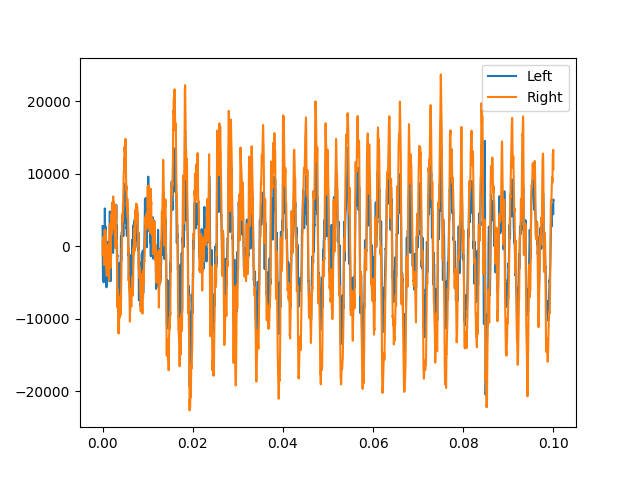

In [394]:
axis = np.linspace(0., th_sound.shape[0]/samplerate, th_sound.shape[0])
plt.figure()
plt.plot(axis, th_sound[:,0], label='Left')
plt.plot(axis, th_sound[:,1], label='Right')
plt.legend()

### Task 7

In [364]:
N_bass = bass_transient.shape[0]
M_bass = 52
bass_window = signal.windows.blackmanharris(M_bass)
bass_window_padded = np.pad(bass_window, (0, N_bass-M_bass))
N_bass

4995

<IPython.core.display.Javascript object>


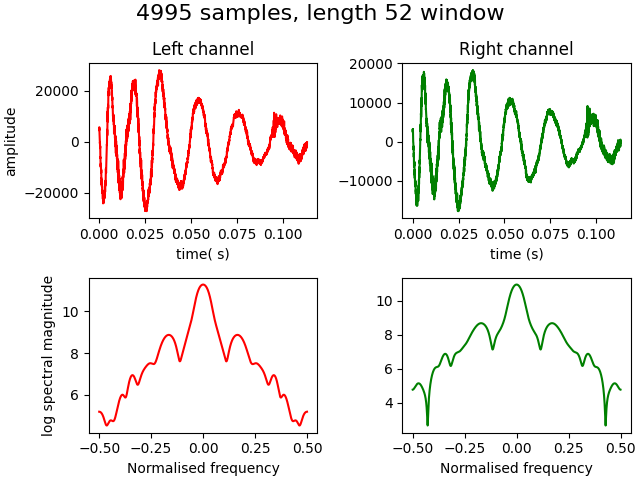

Text(0.5, 0.98, '4995 samples, length 52 window')

In [423]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True, sharey=False)
axis = np.linspace(0., bass_transient.shape[0]/samplerate, bass_transient.shape[0])
ax1.plot(axis, bass_transient[:,0], 'r')
ax2.plot(axis, bass_transient[:,1], 'g')
ax1.set_title('Left channel')
ax2.set_title('Right channel')
ax1.set_xlabel('time( s)')
ax2.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')


ax3.plot(np.fft.fftshift(np.fft.fftfreq(N_bass)), np.fft.fftshift(np.log(np.abs(np.fft.fft(bass_window_padded * bass_transient[:,0])))), 'r')
ax4.plot(np.fft.fftshift(np.fft.fftfreq(N_bass)), np.fft.fftshift(np.log(np.abs(np.fft.fft(bass_window_padded * bass_transient[:,1])))), 'g')
ax3.set_xlabel('Normalised frequency')
ax4.set_xlabel('Normalised frequency')
ax3.set_ylabel('log spectral magnitude')
fig.suptitle('{} samples, length {} window'.format(N_bass, M_bass), fontsize=16)

In [223]:
N_snare = snare_transient.shape[0]
M_snare = 32
snare_window = signal.windows.blackmanharris(M_snare)
snare_window_padded = np.pad(snare_window, (0, N_snare-M_snare))
N_snare

24255

<IPython.core.display.Javascript object>


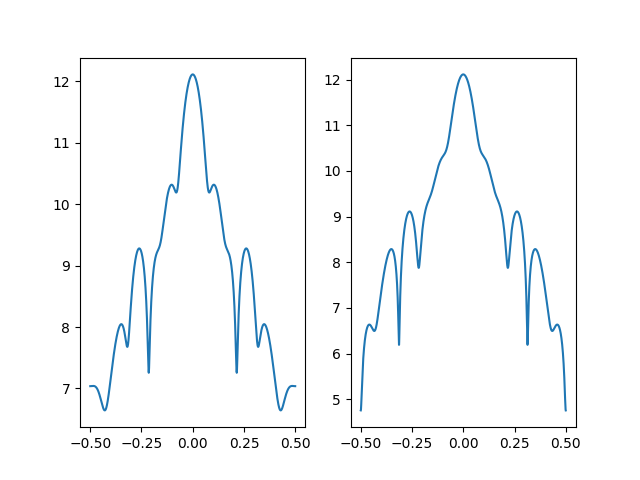

In [275]:
plt.figure()
plt.subplot(121)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N_snare)), np.fft.fftshift(np.log(np.abs(np.fft.fft(snare_window_padded * snare_transient[:,0])))))
plt.subplot(122)
plt.plot(np.fft.fftshift(np.fft.fftfreq(N_snare)), np.fft.fftshift(np.log(np.abs(np.fft.fft(snare_window_padded * snare_transient[:,1])))))

In [360]:
N_steady = steady_note.shape[0]
M_steady = 42
steady_window = signal.windows.blackmanharris(M_steady)
steady_window_padded = np.pad(steady_window, (0, N_steady-M_steady))
N_steady

9261

<IPython.core.display.Javascript object>


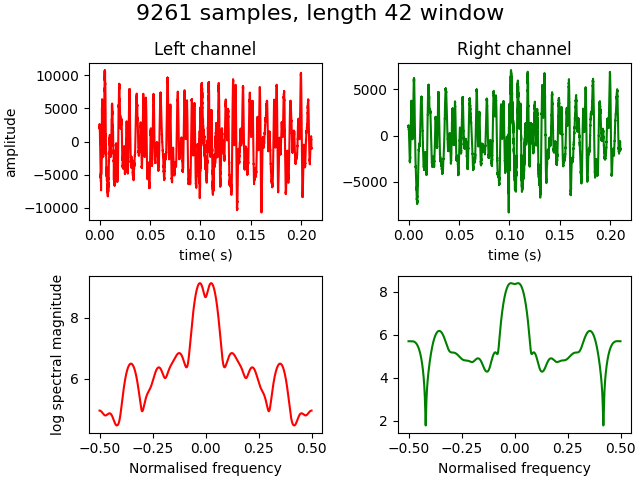

Text(0.5, 0.98, '9261 samples, length 42 window')

In [412]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True, sharey=False)
axis = np.linspace(0., steady_note.shape[0]/samplerate, steady_note.shape[0])
ax1.plot(axis, steady_note[:,0], 'r')
ax2.plot(axis, steady_note[:,1], 'g')
ax1.set_title('Left channel')
ax2.set_title('Right channel')
ax1.set_xlabel('time( s)')
ax2.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')


ax3.plot(np.fft.fftshift(np.fft.fftfreq(N_steady)), np.fft.fftshift(np.log(np.abs(np.fft.fft(steady_window_padded * steady_note[:,0])))), 'r')
ax4.plot(np.fft.fftshift(np.fft.fftfreq(N_steady)), np.fft.fftshift(np.log(np.abs(np.fft.fft(steady_window_padded * steady_note[:,1])))), 'g')
ax3.set_xlabel('Normalised frequency')
ax4.set_xlabel('Normalised frequency')
ax3.set_ylabel('log spectral magnitude')
fig.suptitle('{} samples, length {} window'.format(N_steady, M_steady), fontsize=16)

In [387]:
N_ma = ma_sound.shape[0]
M_ma = 40
ma_window = signal.windows.blackmanharris(M_ma)
ma_window_padded = np.pad(ma_window, (0, N_ma-M_ma))

<IPython.core.display.Javascript object>


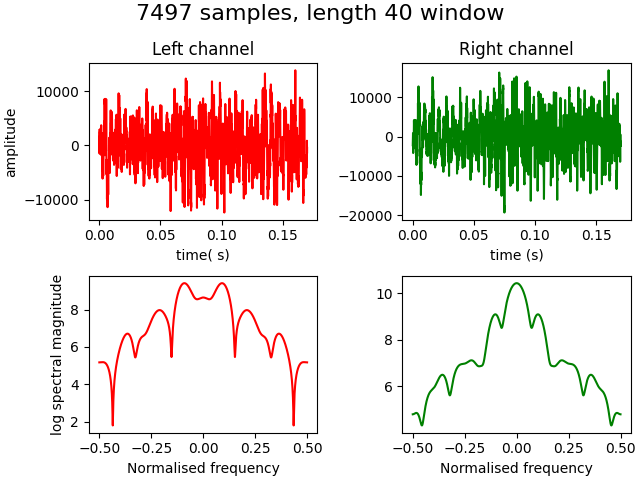

Text(0.5, 0.98, '7497 samples, length 40 window')

In [413]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True, sharey=False)
axis = np.linspace(0., ma_sound.shape[0]/samplerate, ma_sound.shape[0])
ax1.plot(axis, ma_sound[:,0], 'r')
ax2.plot(axis, ma_sound[:,1], 'g')
ax1.set_title('Left channel')
ax2.set_title('Right channel')
ax1.set_xlabel('time( s)')
ax2.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')


ax3.plot(np.fft.fftshift(np.fft.fftfreq(N_ma)), np.fft.fftshift(np.log(np.abs(np.fft.fft(ma_window_padded * ma_sound[:,0])))), 'r')
ax4.plot(np.fft.fftshift(np.fft.fftfreq(N_ma)), np.fft.fftshift(np.log(np.abs(np.fft.fft(ma_window_padded * ma_sound[:,1])))), 'g')
ax3.set_xlabel('Normalised frequency')
ax4.set_xlabel('Normalised frequency')
ax3.set_ylabel('log spectral magnitude')
fig.suptitle('{} samples, length {} window'.format(N_ma, M_ma), fontsize=16)

In [430]:
N_th = th_sound.shape[0]
M_th = 46
th_window = signal.windows.blackmanharris(M_th)
th_window_padded = np.pad(th_window, (0, N_th-M_th))

<IPython.core.display.Javascript object>


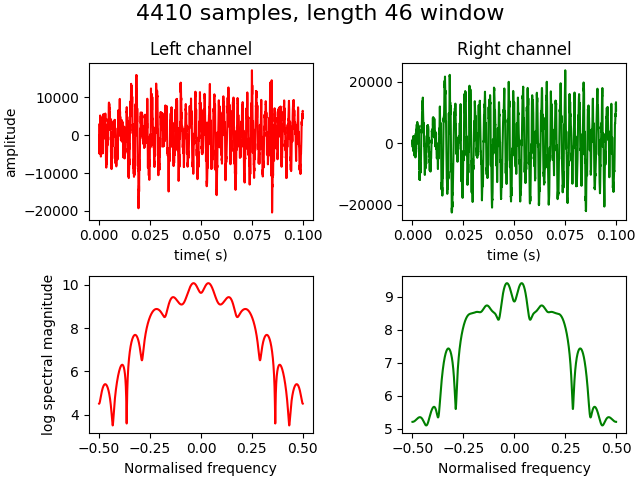

Text(0.5, 0.98, '4410 samples, length 46 window')

In [431]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, constrained_layout=True, sharey=False)
axis = np.linspace(0., th_sound.shape[0]/samplerate, th_sound.shape[0])
ax1.plot(axis, th_sound[:,0], 'r')
ax2.plot(axis, th_sound[:,1], 'g')
ax1.set_title('Left channel')
ax2.set_title('Right channel')
ax1.set_xlabel('time( s)')
ax2.set_xlabel('time (s)')
ax1.set_ylabel('amplitude')


ax3.plot(np.fft.fftshift(np.fft.fftfreq(N_th)), np.fft.fftshift(np.log(np.abs(np.fft.fft(th_window_padded * th_sound[:,0])))), 'r')
ax4.plot(np.fft.fftshift(np.fft.fftfreq(N_th)), np.fft.fftshift(np.log(np.abs(np.fft.fft(th_window_padded * th_sound[:,1])))), 'g')
ax3.set_xlabel('Normalised frequency')
ax4.set_xlabel('Normalised frequency')
ax3.set_ylabel('log spectral magnitude')
fig.suptitle('{} samples, length {} window'.format(N_th, M_th), fontsize=16)

### Task 8

In [483]:
organrate, organ = wavfile.read('./resources/w12res/organ.wav')
N_organ = organ.shape[0]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [517]:
organ_axis = np.arange(N_organ)
M_organ = 85
N_organ

41895

In [518]:
organ_window = signal.windows.blackmanharris(M_organ)
organ_window_padded = np.pad(organ_window, (0, N_organ-M_organ))

<IPython.core.display.Javascript object>


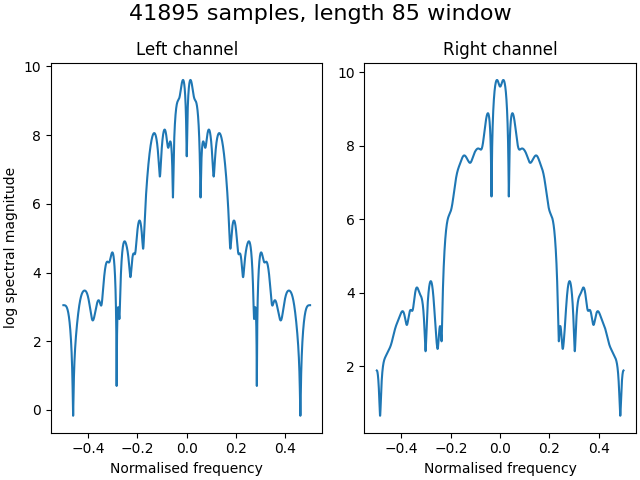

Text(0.5, 0.98, '41895 samples, length 85 window')

In [523]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2, constrained_layout=True, sharey=False)

ax1.plot(np.fft.fftshift(np.fft.fftfreq(N_organ)), np.fft.fftshift(np.log(np.abs(np.fft.fft(organ_window_padded * organ[:,0])))))
ax2.plot(np.fft.fftshift(np.fft.fftfreq(N_organ)), np.fft.fftshift(np.log(np.abs(np.fft.fft(organ_window_padded * organ[:,1])))))
ax1.set_xlabel('Normalised frequency')
ax2.set_xlabel('Normalised frequency')
ax1.set_ylabel('log spectral magnitude')
ax1.set_title('Left channel')
ax2.set_title('Right channel')
fig.suptitle('{} samples, length {} window'.format(N_organ, M_organ), fontsize=16)